# code

In [5]:
from rtree import index
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# initiate

In [43]:
radius = 10
C = 0.05
maxnode = 15000
h = 3
L = 10**5
nodelist,idx,limitt,index2coor= initiate(radius,C,L)
tstep = 1
n = 1
i = 1#实验次数，可加循环
Rx = {}

In [8]:
def step(p):
    C = 0.05
    radius = 10
    h = 3
    L = 10**5
    if p == 1:
        return initiate(radius,C,L)
    else:
        nodelist,idx,limitt,index2coor=step(p-1)
        return onestep(nodelist,index2coor,idx,radius,C,h,limitt,L)

In [9]:
step(2)

({(49999, 49991): {5: 9.055385138137417, 7: 1},
  (50000.0, 50000.0): {5: 0.0, 7: 1}},
 {1: (50000.0, 50000.0), 2: (49999, 49991)},
 array([49989., 49981., 50010., 50010.]))

PPP 7214 5000 2817
Counter({1: 1464, 3: 830, 2: 523})
(50109, 49862, 50151, 49889)


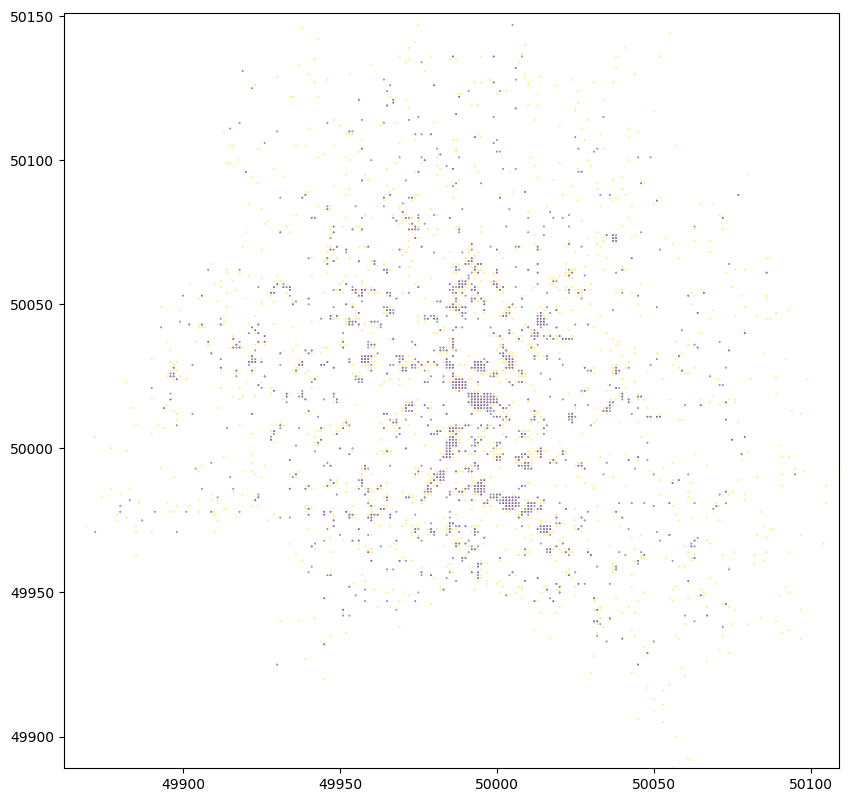

PPP 13607 10000 5222
Counter({1: 2375, 3: 1931, 2: 916})
(50124, 49830, 50177, 49879)


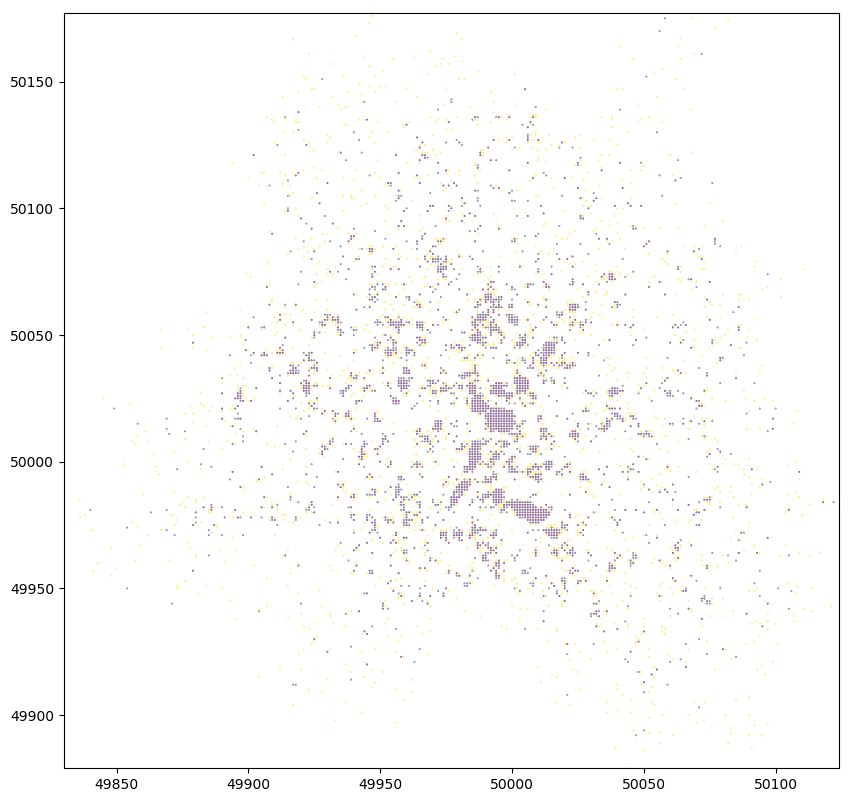

PPP 19789 15000 7487
Counter({3: 3085, 1: 3059, 2: 1343})
(50154, 49817, 50204, 49865)


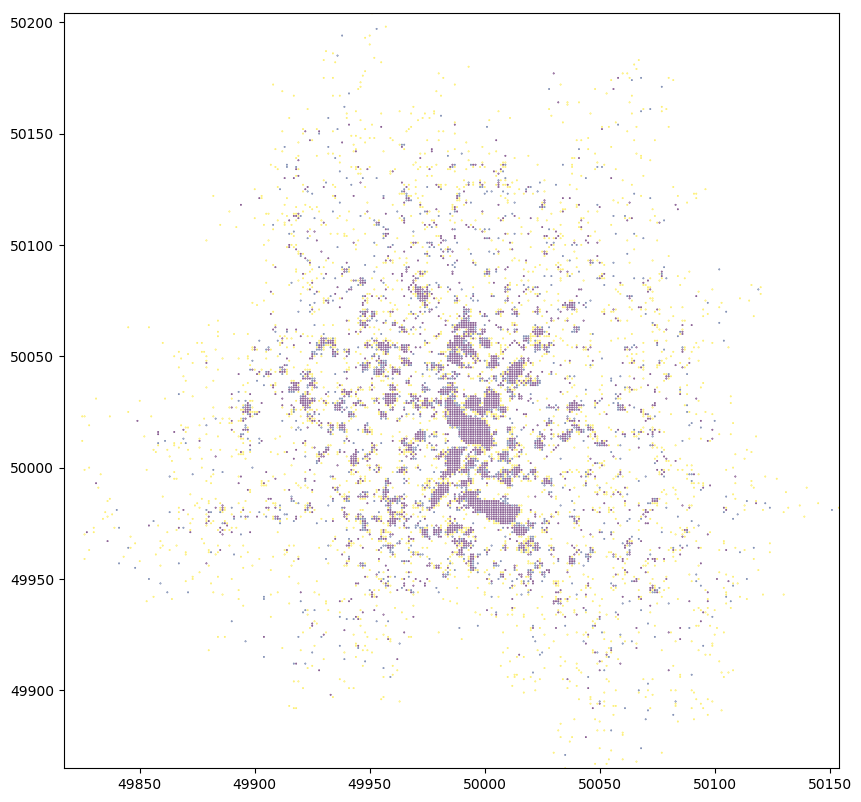

In [44]:
while len(index2coor) < maxnode:
    k1 = len(index2coor)
    nodelist,index2coor,idx,limitt = onestep(nodelist,index2coor,idx,radius,C,h,limitt,L)
    k2 = len(index2coor)
    if (k1 != k2) and k2%5000 == 0:
        print ('PPP',tstep, len(index2coor), len(nodelist))
        side_view(nodelist)
        print (spatial_range(nodelist))
        paint(nodelist)
        Rrhox = caculate(nodelist,radius)
        Rx[n] = Rrhox[:,1]
        n += 1
    tstep += 1

In [5]:
Rrhox

array([[5.00000000e+00, 2.83295799e+00],
       [1.50000000e+01, 1.64035695e+00],
       [2.50000000e+01, 1.07779727e+00],
       [3.50000000e+01, 7.07557404e-01],
       [4.50000000e+01, 5.42187839e-01],
       [5.50000000e+01, 4.60102472e-01],
       [6.50000000e+01, 3.16106202e-01],
       [7.50000000e+01, 2.65894858e-01],
       [8.50000000e+01, 1.90798691e-01],
       [9.50000000e+01, 1.35365467e-01],
       [1.05000000e+02, 8.48826363e-02],
       [1.15000000e+02, 6.10324608e-02],
       [1.25000000e+02, 4.11256373e-02],
       [1.35000000e+02, 2.12206591e-02],
       [1.45000000e+02, 1.47081120e-02],
       [1.55000000e+02, 6.26351712e-03],
       [1.65000000e+02, 6.36619772e-03],
       [1.75000000e+02, 3.63782727e-03],
       [1.85000000e+02, 9.46326689e-04],
       [1.95000000e+02, 2.44853759e-04]])

In [11]:
x,y=[],[]
for a in Rrhox:
    x.append(a[0])
    y.append(a[1]/h)

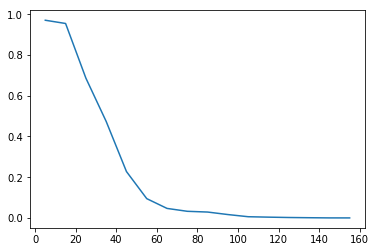

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,y)

E:\Miniconda\envs\py35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


(2.849490577022253, 12608.526376264632)

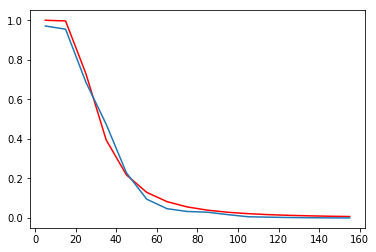

In [13]:
from scipy.optimize import curve_fit
def fun(x, a, n):
    return 1-(1-x**(-a))**n

popt,pcov = curve_fit(fun,x,y)

a = popt[0]
b = popt[1]
yvals = fun(x,a,b)
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.plot(x,y)
a,b

In [11]:
Rrhox

array([[5.00000000e+00, 2.62287346e+00],
       [1.50000000e+01, 1.47695787e+00],
       [2.50000000e+01, 8.33335282e-01],
       [3.50000000e+01, 5.83416549e-01],
       [4.50000000e+01, 3.46957776e-01],
       [5.50000000e+01, 2.70852776e-01],
       [6.50000000e+01, 2.30897094e-01],
       [7.50000000e+01, 1.34114565e-01],
       [8.50000000e+01, 8.66926337e-02],
       [9.50000000e+01, 5.02594557e-02],
       [1.05000000e+02, 4.44118079e-02],
       [1.15000000e+02, 3.18309886e-02],
       [1.25000000e+02, 1.85892974e-02],
       [1.35000000e+02, 1.50902465e-02],
       [1.45000000e+02, 9.32977253e-03],
       [1.55000000e+02, 3.38846008e-03],
       [1.65000000e+02, 1.73623574e-03]])

In [11]:
data_array = np.array(Rrhox)
np.savetxt('data.csv',data_array,delimiter=',')

In [9]:
beta(Rrhox)

E:\Miniconda\envs\py35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
E:\Miniconda\envs\py35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


array([   2.17827292, 1819.33317919])

# out

In [5]:
from rtree import index
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [59]:
def initiate(radius,C,L):
    coordinate = np.ones(2)*L/2.0
    nodelist = {(coordinate[0],coordinate[1]):{5:0.0,7:1}} #5：到心距 7：点数
    index2coor = {1:(coordinate[0],coordinate[1])}
    idx = index.Index()
    idx.insert(1,list(np.r_[coordinate,coordinate]))                     
    limitt = np.r_[coordinate - radius,coordinate + radius] 
    return nodelist,idx,limitt,index2coor

def choosenode(nodelist,limitt,C,index2coor):#?
    white = ( (limitt[2]-limitt[0])*(limitt[3]-limitt[1])-len(nodelist) )*C
    #white = ( (list(limitt)[2]-list(limitt)[0])*(list(limitt)[3]-list(limitt)[1])-len(nodelist) )*C
    exist = len(index2coor)+len(nodelist)*C
    rnd = random.random()*( exist + white )
    if rnd>exist:
        while 1:
            ii = int( random.random()*(limitt[2]-limitt[0])   + limitt[0] )
            jj = int( random.random()*(limitt[3]-limitt[1])   + limitt[1] )
            if (ii,jj) not in nodelist:
                return (ii,jj),0
    else:
        pos = random.randint(1,len(index2coor))#右闭
        return index2coor[pos],1

def onestep(nodelist,index2coor,idx,radius,C,h,limitt,L):
    two,flag = choosenode(nodelist,limitt,C,index2coor)  
    i = two[0]
    j = two[1]
    if flag == 0:
        intersection = list(idx.intersection([i-radius,j-radius, i+radius,j+radius])) 
        if len(intersection) > 0:
            for key in intersection:
                if np.linalg.norm(np.array([index2coor[key]]) - np.array([i,j])) <= radius:  
                    state = 1
                else:
                    state = 0
            if state == 1:
                nodelist,index2coor,idx,limitt = insert_newpoint(i,j,nodelist,index2coor,idx,limitt,L,radius)
        return nodelist,index2coor,idx,limitt      

    elif flag==1: 
        if nodelist[(i,j)][7]+1 <= h:#不溢
            nodelist[(i,j)][7] += 1
            index2coor[len(index2coor)+1]=(i,j)
        else:
            while ((i,j) in nodelist.keys()) and (nodelist[(i,j)][7]+1 > h) :
                (i,j) = sandpile(i,j,h,nodelist)
            if (i,j) in nodelist.keys():#溢出到有点的格子
                nodelist[(i,j)][7] += 1
                index2coor[len(index2coor)+1]=(i,j)
            else:#溢出到空格子
                nodelist,index2coor,idx,limitt  = insert_newpoint(i,j,nodelist,index2coor,idx,limitt,L,radius)
        return nodelist,index2coor,idx,limitt
		
def insert_newpoint(i,j,nodelist,index2coor,idx,limitt,L,radius):
	nodelist[(i,j)] = {5:np.linalg.norm(np.array([i,j])-L/2),7:1}
	index2coor[len(index2coor)+1]=(i,j)
	newpoint = [i,j]
	idx.insert( len(index2coor), np.r_[newpoint, newpoint] )  ###idx
	for x in range(2):
		limitt[x]   = round(min(limitt[x],newpoint[x]-radius))
		limitt[x+2] = round(max(limitt[x+2],newpoint[x]+radius))
	return nodelist,index2coor,idx,limitt

def sandpile(i,j,h,nodelist):
    r = i
    c = j
    arounddic = {
	1:(r-1,c-1),2:(r -1,c),3:(r -1,c+1),
	4:(r,c-1),5:(r,c),6:(r,c+1),
	7:(r+1,c-1),8:(r+1,c),9:(r+1,c+1)
	}
    deltas = []
    #邻接阵arov
    arov={}
    for m in range(1,10):
        if arounddic[m] in nodelist:
            arov[m] = nodelist[arounddic[m]][7]
        else:
            arov[m] = 0
        delta =nodelist[(r,c)][7] - arov[m] 
        deltas.append(delta)
    B = np.cumsum(deltas)
    if B[-1]!= 0:
        rnd = random.random()*B[-1]
        ind = np.nonzero(B<rnd)
        if len(ind[0])==0:
            pos = 1
        else:
            pos = ind[0][-1]+2
    else:#九格同
        pos = 5 
        while pos == 5:
            pos = random.randint(1,9)
		#pos = 1 #左下
		#pos = 9 #右上
    #得到位置
    return arounddic[pos]        

def caculate(nodelist,radius):
    w = []
    delta  = radius
	#delta = radius/2#qqq
    for key in nodelist:
        w.append([nodelist[key][5],nodelist[key][7]])
    w.sort()
    w = np.array(w)
    R = np.arange(0,np.max(w[:,0]),delta)
    RL = np.zeros((len(R),2)) 
    RL[:,0] = R
    for i in range(len(RL)):
        RL[i,1] = np.sum(w[w[:,0]<RL[i,0],1])
    Rrho = np.zeros((len(R),2))
    Rrho[:,0] = R + delta/2
    for i in range(len(Rrho)-1):
        Rrho[i,1] = (RL[i+1,1] - RL[i,1])/(math.pi*(delta**2+2*delta*RL[i,0]))
    a = Rrho
    xx = np.nonzero(a[:,1]==0) 
    if len(xx[0])==0:
        x = 0 
    else:
        x = xx[0][0]
    Rrhox = Rrho[:x,:x]
    return Rrhox

def save(Rx,C,radius,maxnode,h=3,i=1):#i 预留次数参数
    se = {}
    for i in range(1,len(Rx)+1):
        se[i] = pd.Series(Rx[i])
    df = pd.concat([se[i] for i in range(1,len(Rx)+1) ],axis = 1)
    name = "C"+str(C)+"--r"+str(radius)+"--maxnode"+str(maxnode)+"--h"+str(h)+"--i"+str(i)
    df.to_csv(name+".csv")
    print("Winner winner chicken dinner")

def side_view(nodelist):
    h = []
    for k in nodelist:
        h.append(nodelist[k][7])
    a = Counter(h)
    print(a)
	
def spatial_range(nodelist):
    x = []
    y = []
    for k in nodelist.keys():
        x.append(k[0])
        y.append(k[1])
    return max(x),min(x),max(y),min(y)

def paint(nodelist):
	x = nodelist
	a = []
	m = []
	n = []
	c = []
	xmax,xmin,ymax,ymin = spatial_range(x)
	for k,v in x.items():
		a.append(k)
		c.append(1/(v[7]))
	for i in a:
		m.append(i[0])
		n.append(i[1])
	plt.figure(figsize=(10,10),dpi=100)
	plt.scatter(m,n,s = 0.1,c = c)
	plt.xlim((xmin,xmax))
	plt.ylim((ymin,ymax))
	plt.show()

## class：

In [56]:
class city(object):
    
    def __init__(self,H,C,maxP,radius=10,L=10**5,deltaP = 5000):
        self.C,self.H,self.maxP = C,H,maxP
        self.radius,self.L,self.deltaP  = radius,L,deltaP
        
        
    def step(self,p):
        if p == 1:
            return initiate(self.radius,self.C,self.L)
        else:
            nodelist,idx,limitt,index2coor=city.step(self,p-1)
            return onestep(nodelist,index2coor,idx,self.radius,self.C,self.H,limitt,self.L)
        
    def step2(self):        
        nodelist,idx,limitt,index2coor= initiate(self.radius,self.C,self.L)
        n=1
        while len(index2coor) < self.maxP:
            k1 = len(index2coor)
            nodelist,index2coor,idx,limitt = onestep(nodelist,index2coor,idx,self.radius,self.C,self.H,limitt,self.L)
            k2 = len(index2coor)
            if (k1 != k2) and k2%5000 == 0:
                print ('PPP',tstep, len(index2coor), len(nodelist))
                side_view(nodelist)
                print (spatial_range(nodelist))
                paint(nodelist)
                Rrhox = caculate(nodelist,radius)
                Rx[n] = Rrhox[:,1]
                n += 1
            #tstep += 1

In [ ]:
class city(object):
    
    def __init__(self,H,C,maxP,radius=10,L=10**5,deltaP = 5000):
        self.C,self.H,self.maxP = C,H,maxP
        self.radius,self.L,self.deltaP  = radius,L,deltaP
        
        


In [40]:
import sys
sys.setrecursionlimit(1000000) 

In [57]:
demo = city(3,0.05,10000)

PPP 19790 5000 2668
Counter({1: 1243, 3: 907, 2: 518})
(50127, 49893, 50131, 49911)


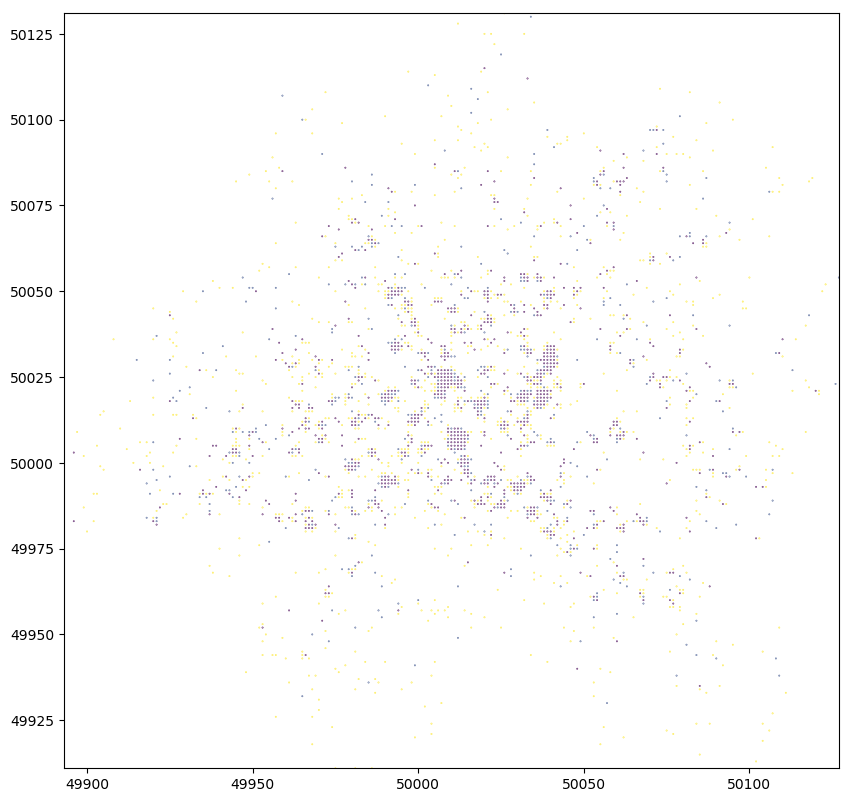

PPP 19790 10000 5018
Counter({1: 2052, 3: 2016, 2: 950})
(50168, 49849, 50149, 49885)


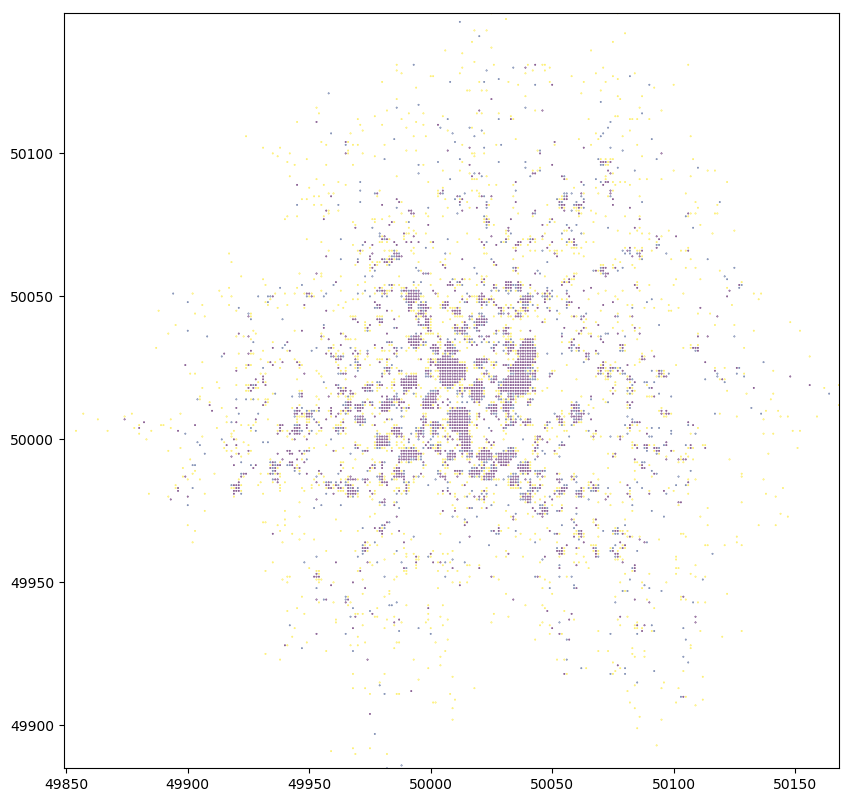

In [58]:
demo.step2()

TypeError: __init__() missing 1 required positional argument: 'radius'

In [2]:
class demo(object):
    def __init__(self,d):
        self.d = 1
    def test(self):
        print(self.d)

In [7]:
d = demo(1)


In [8]:
d.test()

1


# demo

## c & beta

In [76]:
listp = [5000,10000]
radius = 10
h = 10000
L = 10**5
listt = []
for p in listp:
    for logc in np.arange(-2,1.5,0.5):
        C = 10**logc
        betaa = []
        for nn in range(10):
            nodelist,idx,limitt,index2coor= initiate(radius,C,L)
            tstep = 1
            while len(index2coor) < p:
                nodelist,index2coor,idx,limitt = onestep(nodelist,index2coor,idx,radius,C,h,limitt,L)
                tstep += 1
            Rrhox = caculate(nodelist,radius)
            betaa.append(beta(Rrhox))
        betaMean = sum(betaa)/10
        listt.append([C,betaMean,p])
        print(C)
print(listt)

0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
[[0.01, -2.72569442461245, 5000], [0.03162277660168379, -2.1030921970707177, 5000], [0.1, -1.5648666392928932, 5000], [0.31622776601683794, -1.2442771414467144, 5000], [1.0, -1.2361096529039048, 5000], [3.1622776601683795, -1.1885047958204695, 5000], [10.0, -1.2192623020025561, 5000], [0.01, -2.983080021866552, 10000], [0.03162277660168379, -2.1222451474090294, 10000], [0.1, -1.511816190324894, 10000], [0.31622776601683794, -1.3077136523688593, 10000], [1.0, -1.1910797934885946, 10000], [3.1622776601683795, -1.2308031399426236, 10000], [10.0, -1.1811860434030748, 10000]]


In [77]:
listt

[[0.01, -2.72569442461245, 5000],
 [0.03162277660168379, -2.1030921970707177, 5000],
 [0.1, -1.5648666392928932, 5000],
 [0.31622776601683794, -1.2442771414467144, 5000],
 [1.0, -1.2361096529039048, 5000],
 [3.1622776601683795, -1.1885047958204695, 5000],
 [10.0, -1.2192623020025561, 5000],
 [0.01, -2.983080021866552, 10000],
 [0.03162277660168379, -2.1222451474090294, 10000],
 [0.1, -1.511816190324894, 10000],
 [0.31622776601683794, -1.3077136523688593, 10000],
 [1.0, -1.1910797934885946, 10000],
 [3.1622776601683795, -1.2308031399426236, 10000],
 [10.0, -1.1811860434030748, 10000]]

## h & beta&c

In [85]:
listp = [5000,10000]
radius = 10
listh = [3,10]
L = 10**5
listt = []
for p in listp:
    for logc in np.arange(-2,0.1,0.1):
        C = 10**logc
        for h in listh:
            betaa = []
            for nn in range(10):
                nodelist,idx,limitt,index2coor= initiate(radius,C,L)
                tstep = 1
                while len(index2coor) < p:
                    nodelist,index2coor,idx,limitt = onestep(nodelist,index2coor,idx,radius,C,h,limitt,L)
                    tstep += 1
                Rrhox = caculate(nodelist,radius)
                betaa.append(beta(Rrhox))
            betaMean = sum(betaa)/10
            listt.append([C,betaMean,p,h])
            print(C,h)
print(listt)

0.01 3
0.01 10
0.012589254117941675 3
0.012589254117941675 10
0.01584893192461114 3
0.01584893192461114 10
0.01995262314968881 3
0.01995262314968881 10
0.025118864315095822 3
0.025118864315095822 10
0.031622776601683826 3
0.031622776601683826 10
0.039810717055349776 3
0.039810717055349776 10
0.050118723362727303 3
0.050118723362727303 10
0.06309573444801943 3
0.06309573444801943 10
0.07943282347242829 3
0.07943282347242829 10
0.1000000000000002 3
0.1000000000000002 10
0.125892541179417 3
0.125892541179417 10
0.15848931924611173 3
0.15848931924611173 10
0.1995262314968885 3
0.1995262314968885 10
0.25118864315095873 3
0.25118864315095873 10
0.3162277660168389 3
0.3162277660168389 10
0.39810717055349853 3
0.39810717055349853 10
0.501187233627274 3
0.501187233627274 10
0.6309573444801956 3
0.6309573444801956 10
0.7943282347242846 3
0.7943282347242846 10
1.000000000000004 3
1.000000000000004 10
0.01 3
0.01 10
0.012589254117941675 3
0.012589254117941675 10
0.01584893192461114 3
0.01584893192

### test 1

In [79]:
listt

[[0.01, -2.5168015978325, 5000, 3],
 [0.01, -2.821737343916382, 5000, 100],
 [0.03162277660168379, -2.113233436541063, 5000, 3],
 [0.03162277660168379, -1.9922825565488302, 5000, 100],
 [0.1, -1.4852182334360793, 5000, 3],
 [0.1, -1.5915681074035375, 5000, 100],
 [0.31622776601683794, -1.1970105018223767, 5000, 3],
 [0.31622776601683794, -1.3178493363927786, 5000, 100],
 [1.0, -1.0970074249105488, 5000, 3],
 [1.0, -1.168166648512537, 5000, 100],
 [0.01, -2.1099452064357886, 10000, 3],
 [0.01, -2.8962902698232322, 10000, 100],
 [0.03162277660168379, -2.1812279934179157, 10000, 3],
 [0.03162277660168379, -2.1290602427838117, 10000, 100],
 [0.1, -1.5307109830881633, 10000, 3],
 [0.1, -1.4712574969449215, 10000, 100],
 [0.31622776601683794, -1.3280223209212574, 10000, 3],
 [0.31622776601683794, -1.3199579164753286, 10000, 100],
 [1.0, -1.2068572830919806, 10000, 3],
 [1.0, -1.222024043843479, 10000, 100]]

### test2

In [81]:
listt

[[0.01, -2.1009716518999264, 1000, 3],
 [0.01, -2.387025762531328, 1000, 10],
 [0.012589254117941675, -2.1298492804926994, 1000, 3],
 [0.012589254117941675, -2.0811067347830683, 1000, 10],
 [0.01584893192461114, -2.126066220160568, 1000, 3],
 [0.01584893192461114, -2.1167768851730306, 1000, 10],
 [0.01995262314968881, -1.98529267321426, 1000, 3],
 [0.01995262314968881, -1.9465499513070532, 1000, 10],
 [0.025118864315095822, -1.9423604254459577, 1000, 3],
 [0.025118864315095822, -1.7988330599158964, 1000, 10],
 [0.031622776601683826, -1.7336815577113842, 1000, 3],
 [0.031622776601683826, -1.8631543955463852, 1000, 10],
 [0.039810717055349776, -1.643729009333572, 1000, 3],
 [0.039810717055349776, -1.7553271274773923, 1000, 10],
 [0.050118723362727303, -1.4283818005703655, 1000, 3],
 [0.050118723362727303, -1.5921428763226884, 1000, 10],
 [0.06309573444801943, -1.4010866792059296, 1000, 3],
 [0.06309573444801943, -1.4362371856309393, 1000, 10],
 [0.07943282347242829, -1.4325610551769783, 

In [83]:
data_array = np.array(listt)

In [84]:
np.savetxt('data.csv',data_array,delimiter=',')

### test 3